In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import numpy as np
from pathlib import Path
from skimage import io

In [2]:
df=pd.read_excel('D:/qs-analysis/data/lc-ms/ahl-accumulation.xls',sheet_name='data')

In [3]:
def colorFader(c1,c2,n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    mix = np.linspace(0,1,n+1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    cols = list()
    for i in range(n):
        cols.append(mpl.colors.to_hex((1-mix[i])*c1 + mix[i]*c2))
    return cols

def AHL_cmap(Family,n,r=False):
    if Family == 'LuxR':
        c2='#ffffff' #white
        c1='#003f5c' #blue
        if not r:
            Lux_rgbs = colorFader(c1,c2,n)
        else:
            Lux_rgbs = colorFader(c2,c1,n)
        return matplotlib.colors.ListedColormap(Lux_rgbs, name='LuxR')
    elif Family == 'LasR':
        c2='#ffffff' #white
        c1='#dd1c77' #pink #
        if not r:
            Las_rgbs = colorFader(c1,c2,n)
        else:
            Las_rgbs = colorFader(c2,c1,n)
        return matplotlib.colors.ListedColormap(Las_rgbs, name='LasR')
    elif Family == 'TraR':
        c2='#ffffff' #white
        c1='#644895' #purple #
        if not r:
            Tra_rgbs = colorFader(c1,c2,n)
        else:
            Tra_rgbs = colorFader(c2,c1,n)
        return matplotlib.colors.ListedColormap(Tra_rgbs, name='TraR')
def AHL_cols(Family,n):
    if Family == 'LuxR':
        c2='#ffffff' #white
        c1='#003f5c' #blue
        return colorFader(c1,c2,n)
    elif Family == 'LasR':
        c2='#ffffff' #white
        c1='#dd1c77' #pink #
        return colorFader(c1,c2,n)

    elif Family == 'TraR':
        c2='#ffffff' #white
        c1='#644895' #purple #
        return colorFader(c1,c2,n)

In [4]:
from matplotlib import transforms
def label_panel(ax, letter, *,
                offset_left=0.5, offset_up=0.2, prefix='', postfix='', **font_kwds):
    kwds = dict(fontsize=18)
    kwds.update(font_kwds)
    # this mad looking bit of code says that we should put the code offset a certain distance in
    # inches (using the fig.dpi_scale_trans transformation) from the top left of the frame
    # (which is (0, 1) in ax.transAxes transformation space)
    fig = ax.figure
    trans = ax.transAxes + transforms.ScaledTranslation(-offset_left, offset_up, fig.dpi_scale_trans)
    ax.text(0, 1, prefix+letter+postfix, transform=trans, **kwds)

def label_panels(axes, letters=None, **kwds):
    if letters is None:
        letters = axes.keys()
    for letter in letters:
        ax = axes[letter]
        label_panel(ax, letter, **kwds)

In [5]:

Lux_cmap = AHL_cmap('LuxR',100)
Las_cmap = AHL_cmap('LasR',100)
Tra_cmap = AHL_cmap('TraR',100)
Lux_cmap_r = AHL_cmap('LuxR',100,r=True)
Las_cmap_r = AHL_cmap('LasR',100,r=True)
Tra_cmap_r = AHL_cmap('TraR',100,r=True)

In [6]:
AHL_cols("LuxR",3)[1]

'#557f92'

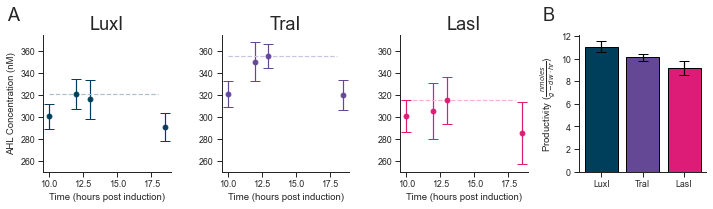

In [7]:
sns.set_context('paper')
sns.set_style('ticks')
f, axes = plt.subplots(ncols=4,figsize=(10,3))
for ax,family,color,c in zip(axes.ravel()[:3],['LuxI','TraI','LasI'],['#003f5c','#644895','#dd1c77'],[AHL_cols("LuxR",3)[2],AHL_cols("TraR",3)[2],AHL_cols("LasR",3)[2]]):
    temp = df.loc[(df.AHL==family) & (df.Time <20)]
    ax.set_title(family,fontsize=18)
    ax.errorbar(temp.Time,temp.Concentration,yerr=temp.STD,color=color,ls='',marker='o',capsize=5,capthick=1,label=family)
    ax.hlines(temp.Concentration.max(),10,18,ls='--',color=c)
    ax.set_xlabel('Time (hours post induction)')
    #ax.legend(frameon=False)
    ax.set_ylim(250,375)
axes[0].set_ylabel('AHL Concentration (nM)')

for family,color in zip(['LuxI','TraI','LasI'],['#003f5c','#644895','#dd1c77']):
    
    temp = df.loc[(df.AHL==family) & (df.Time <20)]
    idx = temp.Concentration.idxmax(axis=0, skipna = True)
    productivity=temp.Concentration[idx]/temp.Time[idx]/temp.Biomass[idx]*50e-3
    err = productivity*temp.STD[idx]/temp.Concentration[idx]
    axes[3].bar(x=family,height=productivity,yerr=err,capsize=5,color=color,lw=1,edgecolor='k',error_kw=dict(ew=1,capthick=1))
axes[3].set_ylabel(r'Productivity ($\frac{nmoles}{g-dw \cdot hr}$)')
label_panel(axes[0],'A')
label_panel(axes[3],'B')
f.tight_layout()
sns.despine()
f.savefig('../Figures/AHL synthesis.png',dpi=600,bbox_inches='tight')

11.050605039671419
10.132618618909033
9.183015298737178


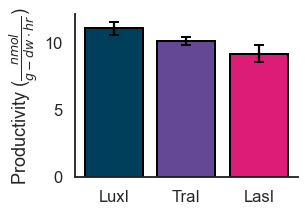

In [8]:
sns.set_context('talk')
sns.set_style('white')
f, ax=plt.subplots(figsize=(4,3))
for family,color in zip(['LuxI','TraI','LasI'],['#003f5c','#644895','#dd1c77']):
    temp = df.loc[(df.AHL==family) & (df.Time <20)]
    idx = temp.Concentration.idxmax(axis=0, skipna = True)
    productivity=temp.Concentration[idx]/temp.Time[idx]/temp.Biomass[idx]*50e-3
    err = productivity*temp.STD[idx]/temp.Concentration[idx]
    ax.bar(x=family,height=productivity,yerr=err,capsize=5,color=color,lw=2,edgecolor='k',error_kw=dict(ew=2,capthick=2))
    print(productivity)
ax.set_ylabel(r'Productivity ($\frac{nmol}{g-dw \cdot hr}$)')
sns.despine()